# Lab 1: Proteínas e Informacion Mutua

En este ejercicio nos familiarizaremos con el formato PDB, que se utiliza para guardar estructuras experimentales de proteínas. También nos familiarizaremos con el formato FASTA, utilizado para guardar secuencias y alineamientos de proteínas.
Visualizaremos la estructura de una proteína en particular, así como un alineamiento de esta, y luego construiremos el *mapa de contacto* de la proteína a partir del PDB (estructura medida experimentalmente) y a partir del alineamiento (a través de la medida de información mutua).

### Recapitulando: ¿qué son las proteínas?

Las proteínas son secuencias de amino ácidos de que doblan en estructuras 3D que determinan su función.

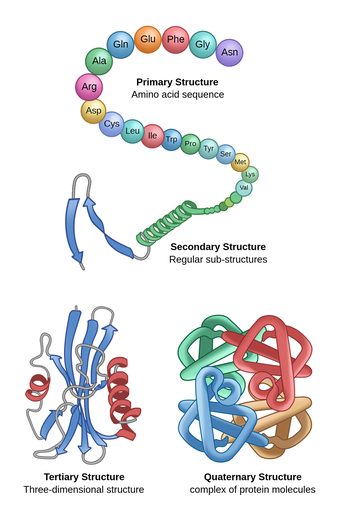


Ejemplo de una proteína: la hemoglobina.

PDB: https://www.rcsb.org/structure/1A3N

Uniprot: https://www.uniprot.org/uniprotkb/P69905/entry

Interpro: https://www.ebi.ac.uk/interpro/entry/pfam/PF00042/

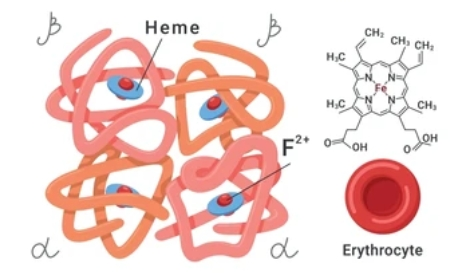


### Instalar e Importar librerías necesarias

In [ ]:
! pip install biopython
! pip install nglview
! pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 69.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 130.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.4 MB/s eta 0:00:00
  Created wheel for nglview: filename=nglview-4.0-py3-none-any.whl size=10672271 sha256=bed7a81000db9ff9f736b3a289

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.metrics import mutual_info_score
from scipy.spatial.distance import pdist, squareform

from Bio.PDB import PDBParser
from Bio.SeqUtils import seq1
from Bio import AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import nglview as nv
import logomaker

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Descargar archivo PDB
! wget https://files.rcsb.org/download/3PDZ.pdb

--2025-12-02 21:59:24--  https://files.rcsb.org/download/3PDZ.pdb
Resolving files.rcsb.org (files.rcsb.org)... 18.64.236.125, 18.64.236.33, 18.64.236.48, ...
Connecting to files.rcsb.org (files.rcsb.org)|18.64.236.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘3PDZ.pdb’

3PDZ.pdb                [ <=>                ]   3.33M  18.8MB/s    in 0.2s    

2025-12-02 21:59:25 (18.8 MB/s) - ‘3PDZ.pdb’ saved [3488994]



## Mapa de Contacto del PDB

In [ ]:
# Leer el archivo PDB
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", "3PDZ.pdb")

#Ver el contenido
print("Modelos")
print( structure.child_dict.keys() )

print("Cadenas")
model = structure[0]
print( model.child_dict.keys() )


Modelos
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
Cadenas
dict_keys(['A'])


In [ ]:
# Ver las coordenadas de un amino acido
model = structure[0]
chain = model["A"]

# Para cada amino acido
for residue in chain:
  print(residue.get_resname())
  for atom in residue:
    print(atom.get_name(), atom.coord)
  break

PRO
N [-22.277   1.764  -4.086]
CA [-22.132   2.484  -2.791]
C [-21.695   1.544  -1.668]
O [-22.33    1.477  -0.615]
CB [-23.482   3.117  -2.464]
CG [-24.301   2.893  -3.69 ]
CD [-23.719   1.68   -4.373]
H2 [-21.755   0.888  -3.919]
H3 [-21.65    2.327  -4.708]
HA [-21.394   3.262  -2.909]
HB2 [-23.916   2.63   -1.602]
HB3 [-23.352   4.17   -2.264]
HG2 [-25.329   2.71   -3.415]
HG3 [-24.234   3.754  -4.338]
HD2 [-24.139   0.776  -3.957]
HD3 [-23.899   1.724  -5.437]


In [ ]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [ ]:
# Extraer la secuencia
secuencia = ""

# Iterar para cada residuo
for residue in chain:

  #Extraer nombre
  amino_acido = residue.get_resname()
  amino_acido = seq1(amino_acido) #convertir a una letra

  #Revisar si es un amino acido estandar
  if amino_acido != "X":
    secuencia = secuencia + amino_acido

print(secuencia)

PKPGDIFEVELAKNDNSLGISVTGGVNTSVRHGGIYVKAVIPQGAAESDGRIHKGDRVLAVNGVSLEGATHKQAVETLRNTGQVVHLLLEKGQSPT


Para construir el mapa de contacto de la estructura, necesitamos calcular las distancias entre todos los pares de amino ácidos. Para esto usamos los carbones alpha del amino ácido.

amino acid.svg

In [ ]:
# Extraer las coordenadas 3D para cada amino acido
coords = []
res_ids = []

# Para cada amino acido
for residue in chain:
  if "CA" in residue:  # saltar residuos sin un Cα
    coords.append(residue["CA"].coord)
    res_ids.append(residue.get_id())

# Convertir la lista de coordenadas a un array de NumPy
coords = np.array(coords)

print(coords)
print(res_ids)

Text(0.5, 1.0, 'Mapa de Contactos')

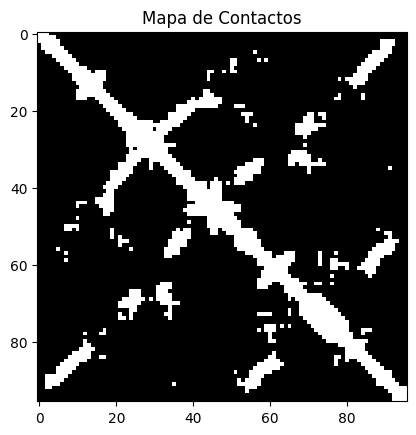

In [ ]:
cutoff = 9.0
diff = coords[:, None, :] - coords[None, :, :]
dist2 = np.sum(diff**2, axis=-1)
contactos = (dist2 < cutoff**2).astype(int)

plt.imshow(contactos, cmap='bone')
plt.title("Mapa de Contactos")

## Mapa de Contacto atraves de las Secuencias

In [ ]:
fasta_file_path = "full_MSA.fasta"
alignment = AlignIO.read(fasta_file_path, "fasta")
len(alignment)

6343

In [ ]:
n_seq = len(alignment)
alignment_length = alignment.get_alignment_length()

sequences_as_char_arrays = []

for seq_record in alignment:
    sequences_as_char_arrays.append(
        np.array(list(str(seq_record.seq)))
        )

msa = np.vstack(sequences_as_char_arrays)

print(msa[:5, :10])


[['P' 'K' 'P' 'G' 'D' 'I' 'F' 'E' 'V' 'E']
 ['P' 'K' 'P' 'G' 'D' 'I' 'F' 'E' 'V' 'E']
 ['P' 'K' 'P' 'G' 'D' 'I' 'F' 'E' 'V' 'E']
 ['P' 'K' 'P' 'G' 'D' 'I' 'F' 'E' 'V' 'E']
 ['P' 'K' 'P' 'G' 'D' 'I' 'F' 'E' 'V' 'E']]


,-,A,C,D,E,F,G,H,I,K,...,N,P,Q,R,S,T,V,W,X,Y
0,0.797887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.202113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.654265,0.011351,0.000631,0.005991,0.016711,0.002522,0.004572,0.002365,0.004414,0.120448,...,0.003784,0.063219,0.047612,0.010090,0.017973,0.006621,0.008198,0.000000,0.0,0.002522
2,0.557938,0.018446,0.001104,0.018288,0.037049,0.000631,0.014031,0.002838,0.002207,0.005360,...,0.008356,0.265332,0.011982,0.003153,0.023175,0.014347,0.002838,0.001419,0.0,0.000315
3,0.452467,0.025855,0.004257,0.013401,0.032004,0.006937,0.268800,0.003468,0.003153,0.009775,...,0.007567,0.064165,0.007252,0.015923,0.028220,0.018288,0.007094,0.003468,0.0,0.013874
4,0.292291,0.012928,0.002680,0.218193,0.231594,0.000788,0.034999,0.005045,0.005676,0.035157,...,0.018288,0.011982,0.041148,0.032004,0.018761,0.018446,0.009302,0.000315,0.0,0.003468


/usr/local/lib/python3.12/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character '-' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.12/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'X' is not in color_dict. Using black.
  warnings.warn(str(Error))


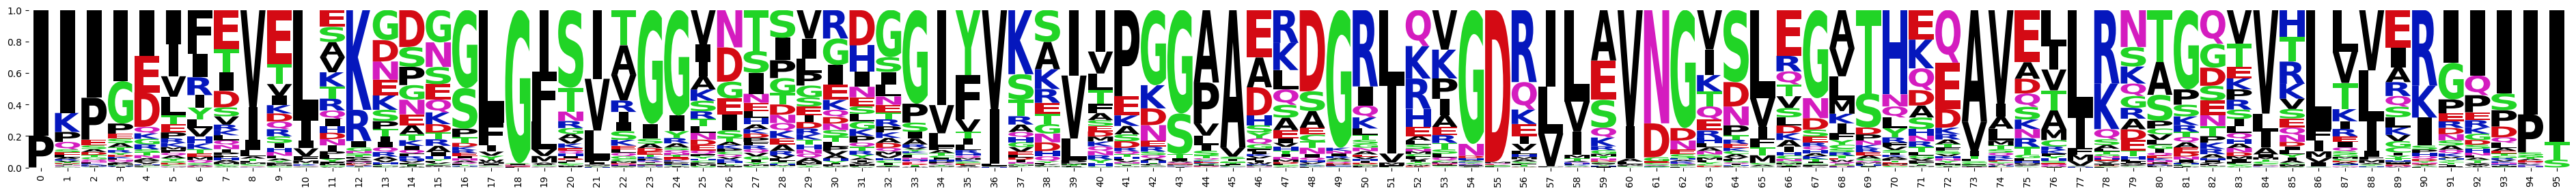

In [ ]:
L = msa.shape[1]

#cada letra unica
all_chars = sorted(list(np.unique(msa)))

# empezar un dataframe vacio para las frecuencias
frequency_matrix = pd.DataFrame(0.0, index=range(L), columns=all_chars)

# frecuencias para cada posicion
for i in range(L):
    position_chars = msa[:, i]
    char_counts = Counter(position_chars)

    total_chars_at_position = sum(char_counts.values())

    for char, count in char_counts.items():
        frequency_matrix.loc[i, char] = count / total_chars_at_position

# mostrar la matriz de frequencias
display(frequency_matrix.head())

# crear la visualizacion
fig, ax = plt.subplots(figsize=(len(frequency_matrix)/2, 3))
logo = logomaker.Logo(frequency_matrix,
                      ax=ax,
                      color_scheme='weblogo_protein'
                      )

# mostrar la visualizacion
logo.style_spines(visible=False)
logo.style_xticks(rotation=90)
plt.show()


## Calcular Weighted Mutual Information (MI)

In [ ]:
def compute_sequence_weights(msa, cutoff=0.8):
    """
    Calcular los pesos para las secuencias

    msa: (N, L) array of characters
    cutoff: %identity threshold for clustering (0.8 = 80%)
    """
    N = msa.shape[0]
    weights = np.zeros(N)

    for i in range(N):
        # contar cuantas secuencias > cutoff identico a secuencia i
        sim = np.mean(msa == msa[i], axis=1)
        weights[i] = 1.0 / np.sum(sim > cutoff)

    return weights

In [ ]:
def weighted_mutual_information(col1, col2, weights):
    W = np.sum(weights)

    # letras unicas
    states1 = np.unique(col1)
    states2 = np.unique(col2)

    # calcular frecuencia con pesos
    p1 = {a: np.sum(weights[col1 == a]) / W for a in states1}
    p2 = {b: np.sum(weights[col2 == b]) / W for b in states2}

    # frecuencia conjunta
    p12 = {}
    for a in states1:
        for b in states2:
            mask = (col1 == a) & (col2 == b)
            p12[(a,b)] = np.sum(weights[mask]) / W

    # calcular la informacion mutua
    mi = 0.0
    for (a, b), p in p12.items():
        if p > 0:
            mi += p * np.log(p / (p1[a] * p2[b]))

    return mi

In [ ]:
def compute_mi_map(msa, cutoff):
    N, L = msa.shape
    weights = compute_sequence_weights(msa, cutoff)

    # convertir int a categor'ias
    _, msa_int = np.unique(msa, return_inverse=True)
    msa_int = msa_int.reshape(N, L)

    mi_matrix = np.zeros((L, L))

    for i in range(L):
        for j in range(i+1, L):
            mi = weighted_mutual_information(msa_int[:, i], msa_int[:, j], weights)
            mi_matrix[i, j] = mi
            mi_matrix[j, i] = mi

    return mi_matrix

In [ ]:
def mi_to_contact_map(mi_map, L):
    """
    Convert MI scores to a binary contact map by taking the top-L pairs.
    """

    mi_flat = mi_map.flatten()

    # remover diagonal
    np.fill_diagonal(mi_map, -np.inf)

    # indices de los top-L mas grandes
    idx = np.argsort(mi_map, axis=None)[-L:]

    # crear mapa binario
    contact_map = np.zeros_like(mi_map, dtype=int)
    contact_map[np.unravel_index(idx, mi_map.shape)] = 1

    # volver simetrico
    contact_map = np.maximum(contact_map, contact_map.T)

    return contact_map

In [ ]:
mi_map = compute_mi_map(msa, cutoff=0.6)
binary_map = mi_to_contact_map(mi_map, 500)

Text(0.5, 1.0, 'Mapa de Contactos')

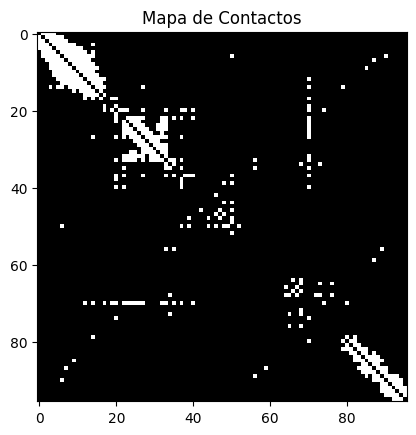

In [ ]:
plt.imshow(binary_map, cmap='bone')
plt.title("Mapa de Contactos")

In [ ]:
def merge_maps(mi_map, true_contact_map):
    """
    Construir una matriz
        Triangulo de arriba = Mapa de contacto de infomacion mutua
        Triangulo de abajo = Mapa de contacto del PDB
    """
    L = mi_map.shape[0]
    merged = np.zeros((L, L))

    # Triangulo de arriba (i < j) -> MI
    iu = np.triu_indices(L, k=1)
    merged[iu] = mi_map[iu]

    # Triangulo de abajo (i > j) -> True contacts
    il = np.tril_indices(L, k=1)
    merged[il] = true_contact_map[il]

    return merged

In [ ]:
merged = merge_maps(binary_map, contactos)
plt.imshow(merged, cmap='bone')
plt.title("Mapa de Contactos")
plt.show()

### Ejercicios:


1.   Variar el valor del cutoff value y ver como cambia el mapa de contacto
2.   Escoger una nueva proteina y calcular el mapa de contacto a partir de el archivo PDB.
2.   Calcular el mapa de contacto a partir de un alineamiento (esto requiere construir el alineamiento).

